## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:
import pandas as pd
import numpy as np


In [2]:
import matplotlib as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

In [3]:
df=pd.read_csv('Airbnb NYC 2019.csv')

In [8]:
# from google.colab import drive
# drive.mount('/content/drive')

In [144]:
df.head()
#The column neighbourhood corresponds to district i.e. administrative area
#The column neighbourhood_group corresponds to town or some portion of district i.e. local area , where site is situated

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,0


In [10]:
list(df.columns)

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

Descriprion of each column:
* id: This columns contains the unique id.

* name: This gives the title of the proerty with its information.

* host_id: This column gives the unique identity number of the each host. Each host has unique id.

* neighbourhood_group: This column corresponds to town or some portion of district i.e. local area where site is situated.

*  neighbourhood: This column corresponds to district i.e. administrative area in the New York city.

* latitude and longitude: Thse two columns give the information about the GPS location of the actual room.

* room_type: This column depicts the type of the property/room listed by the host.

* price: This column gives the price per night of the property.

* minimum_nights: This column gives the information about minimum nights the guest has to book the property/room.

* number_of_reviews: This gives the information about the reviws received by the property.

* last_review: This gives the information of the last review given by the guest.

* reviews_per_month: This column gives the info about the reviws the property/host get every month.

* calculated_host_listings_count: This column gives the information about the total number of guests hosted by the person.

* availability_365: This column tells the whether the property is available for what duration of the year.

Now, calculating the total number of entries the dataset is having.

In [11]:
df.shape

(48895, 16)

We have total of 48895 entries sliced into 16 columns as per above code.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Here, although few columns are of float64 dtype, except latitude and longitude columns, many columnss are categorical in nature as they are of reviews.

So far, we have got fair intro of the dataset. Now let's delve deeper with the little more summary regarding the given dataset.

In [13]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


This gives us the total count of the dataset along with thee mean(average) value, standatd deviation (std), minimum and maximum values alongg with the quartile values.

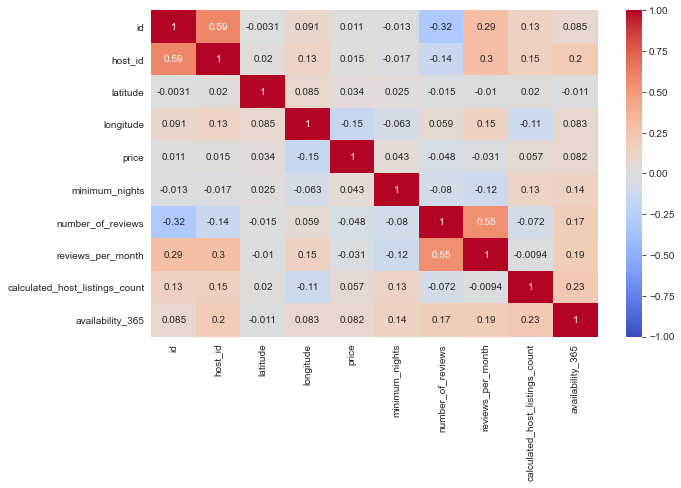

In [146]:
plt.rcParams['figure.figsize'] = (10, 6)
sns.heatmap(df.corr(),annot=True, vmin = -1, cmap = 'coolwarm');

As seen from the heatmap in given data most of coloums contain either categorical data or datetime data or interger/float values which are actually counts/ratings, so we can't see any noticible correlation between them.

Now let's print the total number of missing values in the given dataset.

In [17]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
reviews_per_month,10052,0.205583
last_review,10052,0.205583
host_name,21,0.000429
name,16,0.000327
availability_365,0,0.000000
calculated_host_listings_count,0,0.000000
number_of_reviews,0,0.000000
minimum_nights,0,0.000000
price,0,0.000000
room_type,0,0.000000


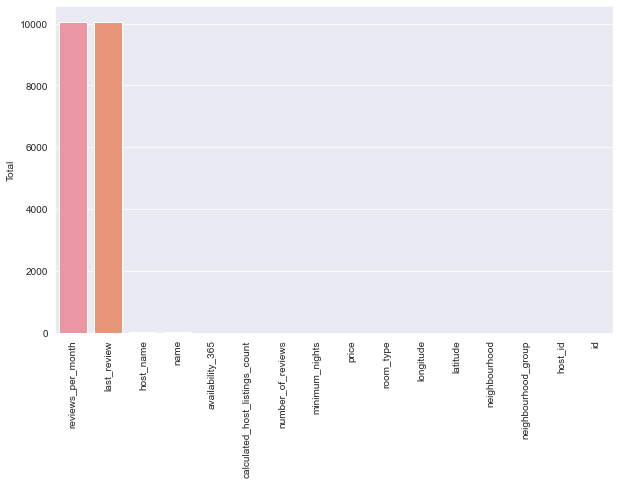

In [143]:
sns.set_style('darkgrid')
#missing_data.plot.bar(y = 'Total', color = 'r');
ax = sns.barplot(x = missing_data.index, y = 'Total', data = missing_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


From theAbove table and the graph, we can see that all columns are free from null values except last_review, reviews_per_month, host_name, name columns which contains some null entries out of which last_review and reviews_per_month each contains 10052 null values which corresponds to 0.205% each. 

Also among of that four column two columns (host_name,name) contain categorical data and remaining two columns (last_review,reviews_per_month) contain data type datetime and float value respectively.

As price is the main factor which would decide whether to book a room not, let's check whether this column has any odd values. So, let's check the cheapest room in the town.

In [23]:
df[df.price==df.price.min()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,NaN,NaN,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333


This is weired! Why would anyone list a property at zero dollers? There must be something wrong. Now, we have to replace this zero by some value. But how? 

Let's do in this way: First check the the total types of the room categories in the each neighbourhood group. Then replace the zero by the avg price of the respective group if the outliers are not present.

In [118]:
df.price.replace(0, np.nan, inplace = True)

10.0

In [29]:
# checking the unique property types
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

As it has only three unique room types, viz. 'Private room', 'Entire home/apt' and 'Shared room', it makes our life little easier.

Now let's check the neighbourhood_group

In [31]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

There are total five neighbourhood groups listed avove. 

Now let's check the private rooms in the Brooklyn neighbourhood group.

In [33]:
df1=df[(df.neighbourhood_group=="Brooklyn")&(df.room_type=='Private room')]

In [47]:
df1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
12,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,2019-06-24,1.34,3,314
21,8024,CBG CtyBGd HelpsHaiti rm#1:1-4,22486,Lisel,Brooklyn,Park Slope,40.68069,-73.97706,Private room,130,2,130,2019-07-01,1.09,6,347
22,8025,CBG Helps Haiti Room#2.5,22486,Lisel,Brooklyn,Park Slope,40.67989,-73.97798,Private room,80,1,39,2019-01-01,0.37,6,364


### while calculating the mean, the zero values shall be avoided. Correct it!

Now, let's get the mean of the the private room type in the Brooklyn area and then replace the zeros by mean.

In [36]:
df1.price.mean()

76.500098697197

Let's check if there are any outliers present in the price column.

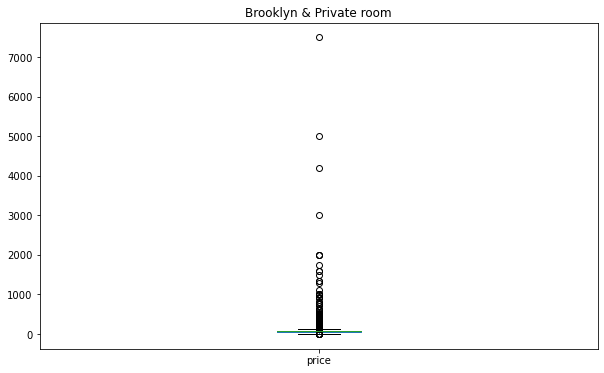

In [37]:
df1.price.plot.box(title='Brooklyn & Private room')

Oops! The above box plot shows there are hundreds of outliers. In this case replacing the zeros by mean would inflate our original price as mean is sensitive to the outliers.

In this case, let's replace the zeros by median of the prices as median doesn't change much even in presence of outliers.

In [39]:
df1.price.median()

65.0

Let's replace the zeros by the median value.

In [41]:
df1.price.replace(0,df1.price.median(),inplace=True)

In [18]:
df1[df1.price==0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


Likewise, let's check the 'Entire home/apt' room type in the Brooklyn area.

In [48]:
df2=df[(df.neighbourhood_group=="Brooklyn")&(df.room_type=='Entire home/apt')]

In [49]:
df2.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
15,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,140,2,148,2019-06-29,1.20,1,46
16,7097,Perfect for Your Parents + Garden,17571,Jane,Brooklyn,Fort Greene,40.69169,-73.97185,Entire home/apt,215,2,198,2019-06-28,1.72,1,321
18,7726,Hip Historic Brownstone Apartment with Backyard,20950,Adam And Charity,Brooklyn,Crown Heights,40.67592,-73.94694,Entire home/apt,99,3,53,2019-06-22,4.44,1,21
20,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,2011-12-28,0.07,1,0


Looking for the zero price in this area,

In [50]:
df2[df2.price==0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73


There is one room with zero price, so replacing this zero by median price.

In [53]:
df2.price.replace(0,df2.price.median(),inplace=True)

C:\Users\Sanketh\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [54]:
df2[df2.price==0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


Let's check the shared room price in the Brooklyn area for zero.

In [55]:
df3=df[(df.neighbourhood_group=="Brooklyn")&(df.room_type=='Shared room')]

In [25]:
df3[df3.price==0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333
26866,21304320,Best Coliving space ever! Shared room.,101970559,Sergii,Brooklyn,Bushwick,40.69166,-73.90928,Shared room,0,30,5,2019-05-24,0.26,6,139


There are two shared rooms with zero prices which will be replaced by median values in the next few steps.

In [57]:
df3.price.median()

36.0

In [58]:
df3.price.replace(0,df3.price.median(),inplace=True)

C:\Users\Sanketh\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [59]:
df3[df3.price==0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


Now, coming the Manhattan neighbourhood group.

In [61]:
df4=df[(df.neighbourhood_group=="Manhatten")&(df.room_type=='Entire home/apt')]

In [62]:
df4[df4.price==0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


There is no Entire home/apt room type with zero price!

Hovering over to Private Room in the same area.

In [65]:
df5=df[(df.neighbourhood_group=="Manhatten") & (df.room_type=='Private room')]

In [66]:
df5[df5.price==0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


Again, there are no rooms with zero prices

In [67]:
df6=df[(df.neighbourhood_group=="Manhatten")&(df.room_type=='Shared room')]

In [68]:
df6[df6.price==0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


Yet again, there are no zero prices. 

Finally, we can say that all zeros in the price column are replaced by the median values of the respective room types as the price of the room depends on the type of the room.

### As per zero price df, there is no zero price in the Queens area, so we can drop this. Instead, we have to check for the Bronx area.

Now, let's see the popular neighbourhoods in the NYC. Instead of conventional plots, let's plot a wordcloud.A wordcloud is a  visual representation object for text processing, which shows the most frequent word with bigger and bolder letters, and with different colors. The smaller the the size of the word the lesser it’s important.

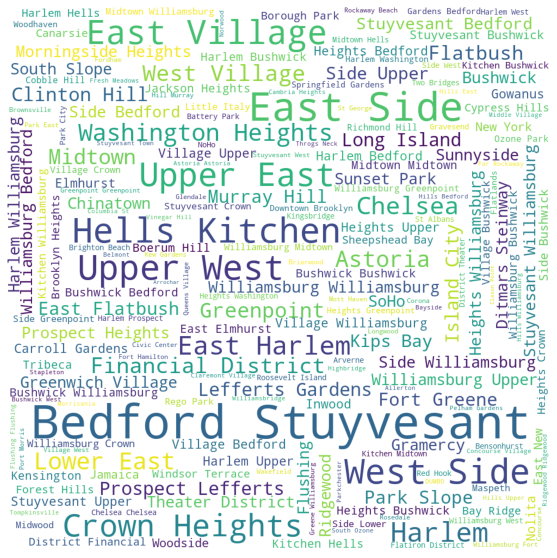

In [156]:
lst = []
for i in df.neighbourhood:
        lst.append(i)

words = lst
text = str(words)

new = text.replace("'", "")

from wordcloud import WordCloud
import matplotlib.pyplot as plt 

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 10))
    
    plt.imshow(wordcloud) 
    
    plt.axis("off");

wordcloud = WordCloud(width = 1000, height = 1000, background_color='white').generate(new)
plot_cloud(wordcloud)



We can see that some of the popular neighbourhoods are Bedford-Stuyvesant, Williamsburg, Upper West Hells Kitchen etc.

### Question1:  What can we learn about different hosts and areas?


The number of reviews matter a lot in the online room booking scenario as review and the opinion of the experienced person helps others to book the particular room. So, let's check the host who has got the maximum reviews.

In [69]:
df[['host_name']][df.number_of_reviews == df.number_of_reviews.max()]

,host_name
11759,Dona


Turns out that, Dona has got maximum reviews. Let's print the details of this host.

In [70]:
df.iloc[[11759]]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.6673,-73.76831,Private room,47,1,629,2019-07-05,14.58,2,333


Dona from Jamaica with 629 reviews.

Now Let's check availability of site which is maximum days throuout year.

In [71]:
len(df[df.availability_365 == 365])

1295

There are 1295 rooms which are available to book throughout the year.

In [72]:
df[df.availability_365 == 365].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365
97,21644,"Upper Manhattan, New York",82685,Elliott,Manhattan,Harlem,40.82803,-73.94731,Private room,89,1,1,2018-10-09,0.11,1,365


Now let's see where in the New York city our rooms lie. We will use latitude and longitude to locate the rooms in the map.

In [73]:

plot_df=df[['neighbourhood_group','neighbourhood','latitude','longitude', 'price']]

In [74]:
plot_df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,price
0,Brooklyn,Kensington,40.64749,-73.97237,149
1,Manhattan,Midtown,40.75362,-73.98377,225
2,Manhattan,Harlem,40.80902,-73.94190,150
3,Brooklyn,Clinton Hill,40.68514,-73.95976,89
4,Manhattan,East Harlem,40.79851,-73.94399,80


Map shows all sites listed on airbnb with respect to their longitude and latitude


#Plot the map
us_cities = plot_df 
#Graphical representation of all sites of host listed on airbnb are shown below with respect to their longitude and latitude

fig = px.scatter_mapbox(us_cities, lat="latitude", lon="longitude", hover_name="neighbourhood", hover_data=["neighbourhood_group",'price'],
                        color_discrete_sequence=["fuchsia"], zoom=13, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

From above map we can see that most of sites are located within three neighbourhood groups i.e. Brooklyn ,Queens and Manhattan. we can also varify this conclusion mathematically which is shown below..

In [75]:
# total rooms in Brooklyn
total_Brooklyn = df[df.neighbourhood_group=='Brooklyn']

# calculating the total percentage of the rooms in Brooklyn
total_Brooklyn_Percentage = total_Brooklyn.shape[0]/df.shape[0]*100
total_Brooklyn_Percentage

41.11667859699356

There are 41% rooms in Brooklyn.

In [76]:
# total rooms in Brooklyn
total_Queens=df[df.neighbourhood_group=='Queens']

# calculating the total percentage of the rooms in Brooklyn
total_Queens_Percentage = total_Queens.shape[0]/df.shape[0]*100
total_Queens_Percentage

11.588096942427653

There are 11.5% rooms in Queens area.

In [77]:
# total rooms in Brooklyn
total_Manhattan=df[df.neighbourhood_group=='Manhattan']

# calculating the total percentage of the rooms in Brooklyn
total_Manhattan_Percentage = total_Manhattan.shape[0]/df.shape[0]*100
total_Manhattan_Percentage

44.30105327743123

There are 44% rooms in Manhattan area.

In [78]:
total_percentage_of_sites = total_Brooklyn_Percentage + total_Manhattan_Percentage + total_Queens_Percentage
total_percentage_of_sites

97.00582881685244

Therefore from above calculations, we can say that approximately 97% of sites are located within three neighbourhood groups Brooklyn ,Queens and Manhattan.
As these three sights have almost all the rooms, let's focus on these three groups and extract the information which would help us in understanding the behaviour of the visitors.

### Question2: What can we learn from predictions? (ex: locations, prices, reviews, etc)

In [53]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Now let's calculate the no of hosts.

In [54]:
df['host_name'].nunique()

11452

There are 11452 hosts.

In [79]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

So far, we have just imputed values with respective medians. Now let's delve deeper into the further insights.

Now, let's restrict ourselves to the Private room type in the Manhattan group.

In [81]:
manhattan_Private_room_price = df[(df.neighbourhood_group == 'Manhattan') & (df.room_type == 'Private room')]
manhattan_Private_room_price.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
11,5441,Central Manhattan/near Broadway,7989,Kate,Manhattan,Hell's Kitchen,40.76076,-73.98867,Private room,85,2,188,2019-06-23,1.50,1,39
13,6021,Wonderful Guest Bedroom in Manhattan for SINGLES,11528,Claudio,Manhattan,Upper West Side,40.79826,-73.96113,Private room,85,2,113,2019-07-05,0.91,1,333


In [82]:
manhattan_Private_room_price.shape

(7982, 16)

In [83]:
manhattan_Private_room_price.price.max()

9999

There are 7982 private rooms listed by the hosts in the Manhattan with 9999 dollers as the highest room price.

In [84]:
manhattan_Private_room_price[manhattan_Private_room_price.price == manhattan_Private_room_price.price.max()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
12342,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.14,1,83


From above code we can see that maximum price for private room in Manhattan is 9999 for minimum 99 nights, similarly we can find it for Broklyn and Queens.

In [60]:
# there are chances of same name for multiple hosts: no, host id is unique for each hostb
# per night charges are confusion. The charges are for total no of nights or per night?

Now, hovering over the total room types in the Manhattan group.

In [5]:
manhattan = df[df.neighbourhood_group == 'Manhattan']
manhattan.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220


In [86]:
manhattan_room =manhattan.room_type.value_counts()
manhattan_room = pd.DataFrame(manhattan_room)
manhattan_room.rename({'room_type': 'Total_Count'}, axis = 1, inplace = True)
manhattan_room.reset_index(inplace = True)
manhattan_room

,index,Total_Count
0,Entire home/apt,13199
1,Private room,7982
2,Shared room,480


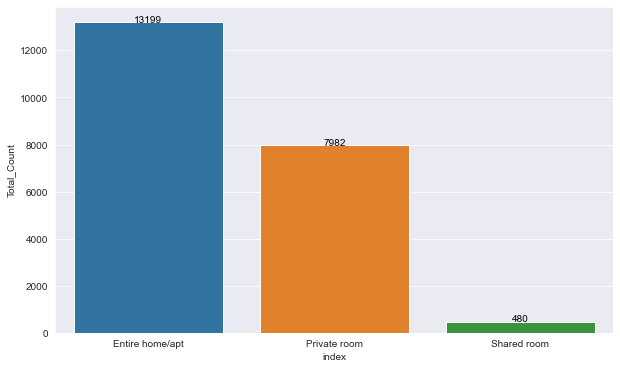

In [87]:
sns.set_style('darkgrid')
ax = sns.barplot(x = 'index', y = 'Total_Count', data = manhattan_room)
#ax.set(ylim=(0, 20000))

for index, row in manhattan_room.iterrows():
    ax.text(row.name,row.Total_Count, round(row.Total_Count,2), color='black', ha="center")

From above barplot, one can see that Entire Home/apt are the highest in number followed by Private Rooms and shared rooms meaning that Entire home/apt is quite popular in this area. From this one can day that maximum visitors prefer Entire home/apt in Manhattan area i.e. there are high chances that new people visiting to Manhattan will prefer Entire home/apt. option.

Similarily, performing the same operations for Brooklyn and Queens area,

In [6]:
brooklyn = df[df.neighbourhood_group == 'Brooklyn']
brooklyn.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
12,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,2019-06-24,1.34,3,314
15,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,140,2,148,2019-06-29,1.20,1,46


In [90]:
brooklyn_room = brooklyn.room_type.value_counts()
brooklyn_room = pd.DataFrame(brooklyn_room)
brooklyn_room.rename({'room_type': 'Total_Count'}, axis = 1, inplace = True)
brooklyn_room.reset_index(inplace = True)

In [91]:
brooklyn_room

,index,Total_Count
0,Private room,10132
1,Entire home/apt,9559
2,Shared room,413


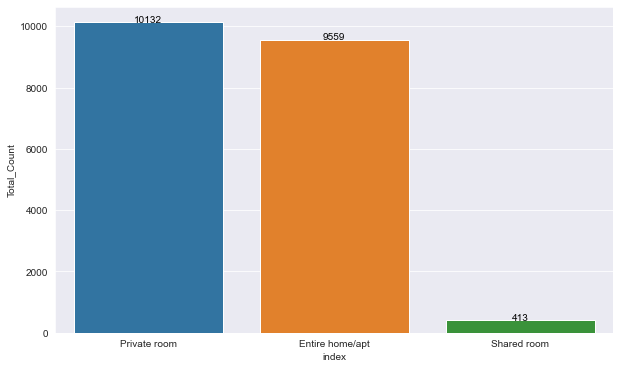

In [92]:
ax1 = sns.barplot(x = 'index', y = 'Total_Count', data = brooklyn_room)
#ax.set(ylim=(0, 20000))

for index, row in brooklyn_room.iterrows():
    ax1.text(row.name,row.Total_Count, round(row.Total_Count,2), color='black', ha="center")

In above barplot maximum visitors prefer Entire home/apt and Private room near with equal ratio in brooklyn area so we can say that there are high chances that new people visiting to Brooklyn will prefer Entire home/apt or Private room option.

In [7]:
# segregating the rooms in  Queens group.
queens = df[df.neighbourhood_group == 'Queens']
queens.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
46,12937,"1 Stop fr. Manhattan! Private Suite,Landmark B...",50124,Orestes,Queens,Long Island City,40.74771,-73.94740,Private room,130,3,248,2019-07-01,2.25,1,215
77,18198,Little King of Queens,70091,Justin,Queens,Woodside,40.75038,-73.90334,Private room,70,30,25,2019-05-31,0.22,1,324
143,32363,Fully Furnished Basement Apartment,140025,Fredah,Queens,Flushing,40.74028,-73.83168,Private room,140,2,1,2011-09-19,0.01,1,1
161,39593,"A room w/ a Manhattan view, longer stay",110506,Myung,Queens,Sunnyside,40.74559,-73.92313,Private room,79,30,28,2019-04-12,0.26,1,126
181,45910,Beautiful Queens Brownstone! - 5BR,204539,Mark,Queens,Ridgewood,40.70382,-73.89797,Entire home/apt,350,8,10,2019-05-12,0.11,5,365


In [121]:
queens_room = queens.room_type.value_counts()

queens_room = pd.DataFrame(queens_room)
queens_room.rename({'room_type': 'Total_Count'}, axis = 1, inplace = True)
queens_room.reset_index(inplace = True)

In [122]:
queens_room

,index,Total_Count
0,Private room,3372
1,Entire home/apt,2096
2,Shared room,198


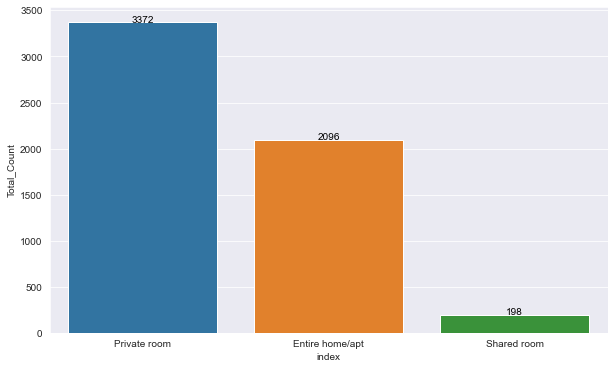

In [123]:
ax2 = sns.barplot(x = 'index', y = 'Total_Count', data = queens_room)
#ax.set(ylim=(0, 20000))

for index, row in queens_room.iterrows():
    ax2.text(row.name,row.Total_Count, round(row.Total_Count,2), color='black', ha="center")

In above barplot maximum visitors prefer Private room in Queens area so we can say that there is high chances new people visiting to Queens might prefer Private room option.

It can be seen from the above three graphs that Entire Home/Apartments are widely popular in the tourists visiting Manhattan whereas Private rooms are are popular in Brooklyn and Queens. Shared rooms are least popular in all the three areas.

Now, let's analyse the neighbourhoods in the each neighbourhood group. 

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


'for index, row in total_count.iterrows():\n    ax2.text(row.name,row.Total_Count, round(row.Total_Count,2), color=\'black\', ha="center")'

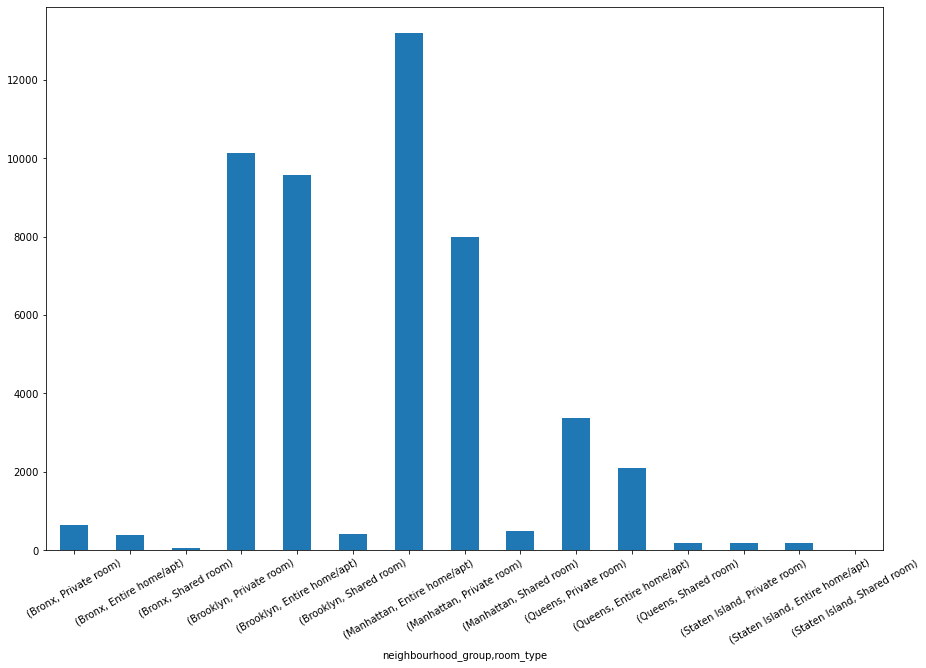

In [13]:
plt.rcParams['figure.figsize'] = (15,10)
total_count = df.groupby('neighbourhood_group')['room_type'].value_counts()
total_count.plot.bar(rot = 30)

'''for index, row in total_count.iterrows():
    ax2.text(row.name,row.Total_Count, round(row.Total_Count,2), color='black', ha="center")'''

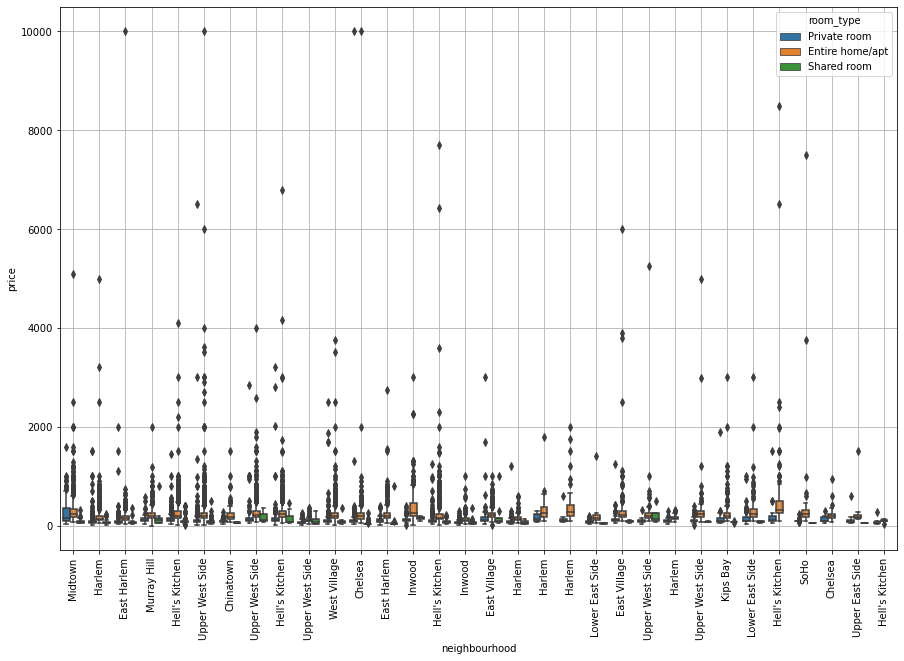

In [17]:
a = sns.boxplot(x = manhattan.neighbourhood, y = manhattan.price, hue = df.room_type)
a.set_xticklabels(manhattan.neighbourhood, rotation=90);
a.grid()

From above graph it's clear that minimum price of the rooms is more or less the same in every neighbourhood but the upper bound varies drastically. 
Here, there is an interesting observation. Few entries have occured multiple times for example Hell's Kitchen, Harlem etc. One erason according to our logic is that data could have been generated multiple times by multiple sources and put together.
Hell's Kitchen when occurs for the first time has multiple outliers for Entire apartment whereas only one outlier when occurs for the next time. This clearely shows some mistake in data collection!

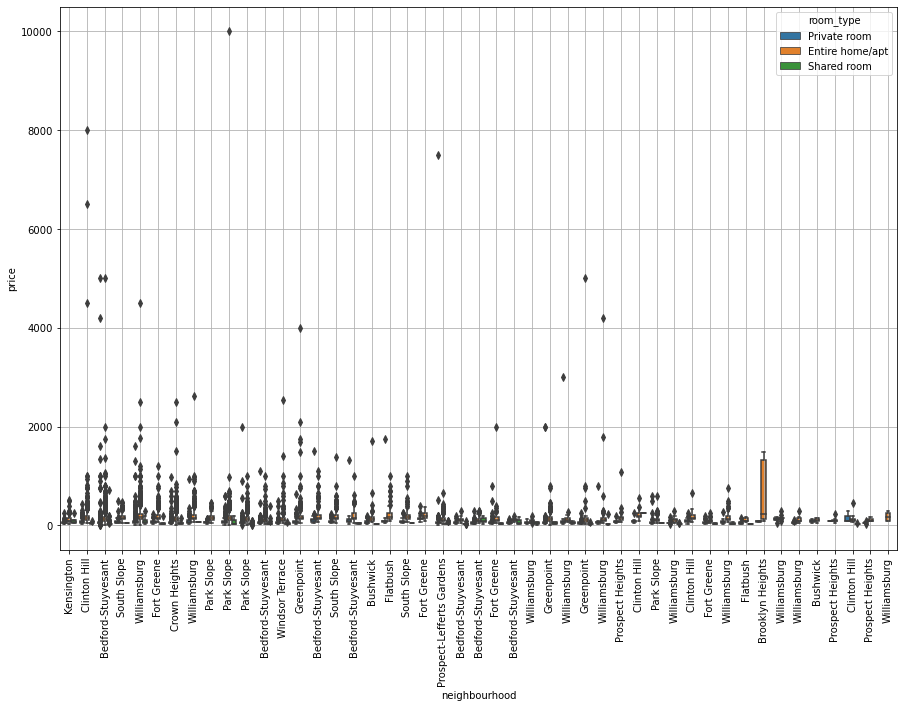

In [19]:
s = sns.boxplot(x = 'neighbourhood', y = 'price', hue = 'room_type', data = brooklyn)
#a = sns.boxplot(x = manhattan.neighbourhood, y = manhattan.price, hue = df.room_type)
s.set_xticklabels(brooklyn.neighbourhood, rotation=90);
s.grid()

Brooklyn comparatively has lower outliers in terms of room prices. From the trend of the prices, we can clearely see the preferred neighbourhoods.

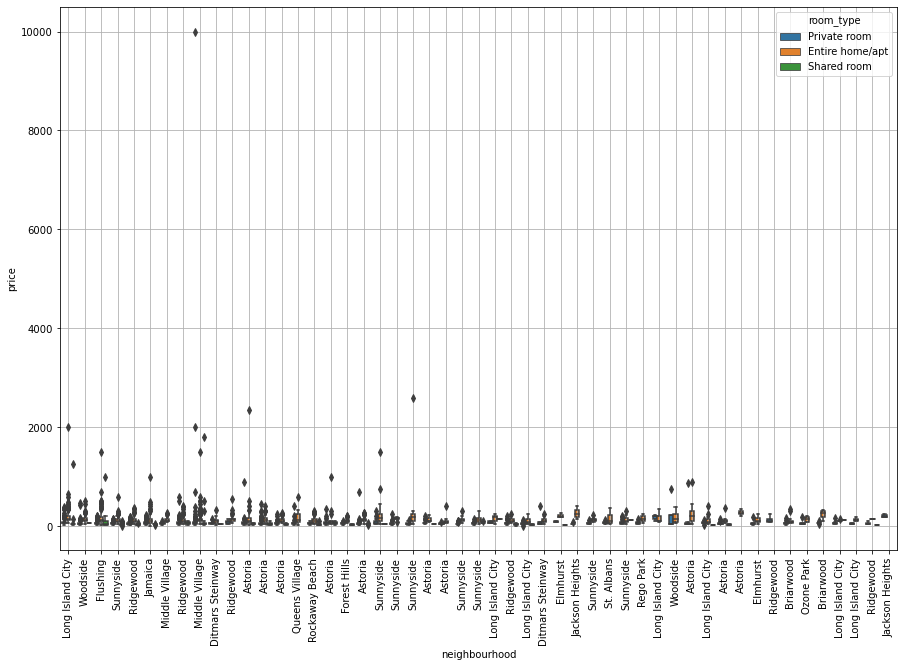

In [30]:
k = sns.boxplot(x = 'neighbourhood', y = 'price', hue = 'room_type', data = queens)
#a = sns.boxplot(x = manhattan.neighbourhood, y = manhattan.price, hue = df.room_type)
k.set_xticklabels(queens.neighbourhood, rotation=90);
k.grid()

From the data, queens has lower bookings so lower outliers in terms of price. Here also, we can see that there are multiple entries with the same name. This clerely shows the faulty recording of the data. More investigation about the source of the data needs to be done.

Now let's hover over minimum nights.

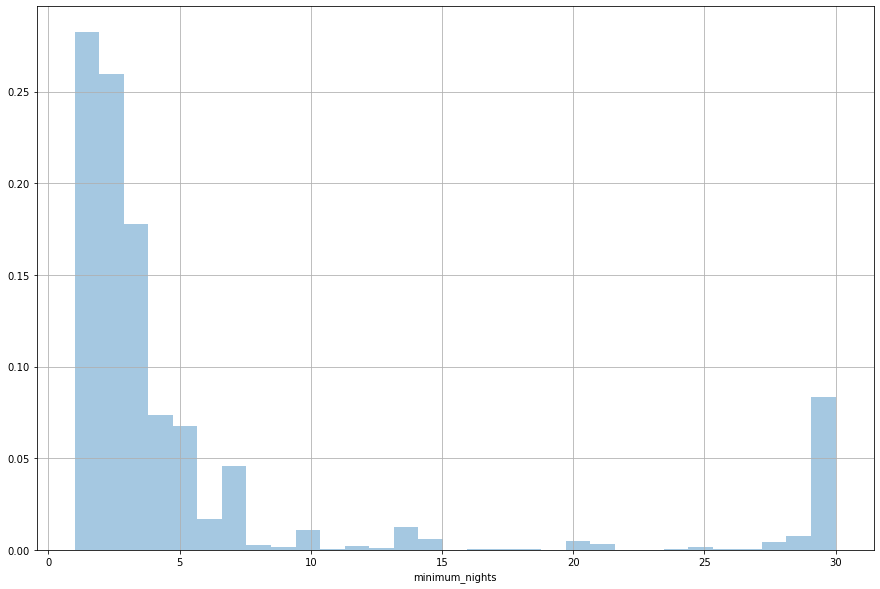

In [33]:
#sns.distplot((df[df.minimum_nights < 31]), bins = 30, hist = False)
sns.distplot(df[(df['minimum_nights'] <= 30) & (df['minimum_nights'] > 0)]['minimum_nights'], bins=31, kde = False, norm_hist = True).grid()

From above histogram, we can say that, more than 25% bookings are for 2 to 4 nights which is quite obvious as when we visit the new place, we don't want to stay only at one location for the entire trip and try to explore new places to stay.

In [34]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [35]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [37]:
df.last_review = pd.to_datetime(df.last_review)

In [39]:
df.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

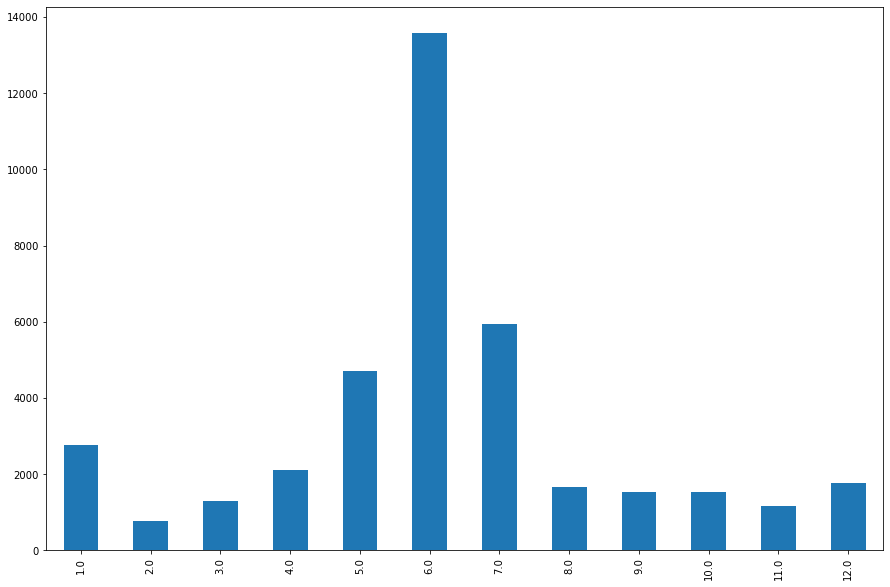

In [54]:
df.last_review.dt.month.value_counts().sort_index().plot(kind = 'bar');

Above graph shows in which month tourist gave the review. Generally, person reviews the place while leaving the place. From above graph, we see that max reviews are recorded in the month of June followed by July. This is because last wekks of the May is the time when the Summer starts in NY. Hence, we can conclude that the above data is correct desipte almost 11k NaN values and it also follows the Normal distribution curve upto certain extent. People and tourist tend to enjoy summer holidays and hence NY attracts highest tourists in this season.

In [104]:
temp=pd.DataFrame(df['price']/df['minimum_nights'])
temp.rename({0:'price per night'},axis=1,inplace=True)
temp_df=pd.concat([df,temp],axis=1)

In [105]:
temp_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price per night
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,149.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,225.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,50.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,89.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,8.0


### price per night has zero value

In [111]:
temp_df[temp_df['price per night'] == 0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price per night
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28,0.0
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127,0.0
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0,0.0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0,0.0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73,0.0
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176,0.0
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232,0.0
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222,0.0
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,NaN,NaN,1,0,0.0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333,0.0


In [106]:
df.minimum_nights.value_counts().sort_values(ascending = False).head(10)

1     12720
2     11696
3      7999
30     3760
4      3303
5      3034
7      2058
6       752
14      562
10      483
Name: minimum_nights, dtype: int64

####  Rooms available for single night are highest followed by two and three nights.

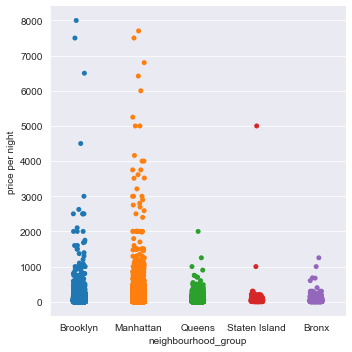

In [107]:
a_plot = sns.catplot(x = 'neighbourhood_group', y = 'price per night', data = temp_df)
#a_plot.set(xlim=(0, 45))
#a_plot.set(ylim=(0, 10000))

# rearange plot with new range on y axis with difference of 1000

#### There is high possibility that new tourist will visit the site from the above three neighbourhood groups.

In [76]:
df[df['price'] == df.price.max()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,NaN,1,83


#### Highest price room for per night is 10000 dollers in the Brooklyn- Greenpoint, Manhattan-Upper West Side, Queens-Astonia. From the above data, we can say that Queens area is the costliest as we have to pay 10000 dollers for single private room.

#### Therefore new customer has high chances of booking on Airbnb website for  Brooklyn, Manhattan, Queens neighbourhood_group for single night with room type private room, entire home in Queens, Manhattan respectively.

### Question3: Which hosts are the busiest and why?

In [77]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [152]:
df.groupby('availability_365')['neighbourhood_group'].count()

availability_365
0      17533
1        408
2        270
3        306
4        233
       ...  
361      111
362      166
363      239
364      491
365     1295
Name: neighbourhood_group, Length: 366, dtype: int64

17533 hosts are busiest whole 365 days means there is high chances that new host listing their site on Airbnb might not available for accepting new  booking.

In [113]:
a = df[df['availability_365'] == 0].host_name.unique()

In [114]:
lst = []
count = 0
for i in a:
    lst.append(i)
    count += 1

In [115]:
pd.DataFrame(lst).shape

(5743, 1)

In [116]:
pd.DataFrame(lst, columns = ['Host_name']).head(10)

,Host_name
0,Laura
1,Garon
2,MaryEllen
3,Alina
4,Chaya
5,Claude & Sophie
6,Jennifer
7,Sara
8,Pas
9,Christiana


From the above data, we can say that there are 5743 hosts who are busiest with multiple properties (because of having zero availability time).

In [108]:
question_3 = df[df['calculated_host_listings_count'] == df['calculated_host_listings_count'].max()]
question_3.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
38293,30181691,Sonder | 180 Water | Incredible 2BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,29,0,NaN,NaN,327,309
38294,30181945,Sonder | 180 Water | Premier 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,2019-05-29,0.73,327,219
38588,30347708,Sonder | 180 Water | Charming 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,29,1,2019-05-21,0.60,327,159
39769,30937590,Sonder | The Nash | Artsy 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74792,-73.97614,Entire home/apt,262,2,8,2019-06-09,1.86,327,91
39770,30937591,Sonder | The Nash | Lovely Studio + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74771,-73.97528,Entire home/apt,255,2,14,2019-06-10,2.59,327,81


In [133]:
df[df['room_type'] == 'Entire home/apt'].head(50)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3,74,2019-06-22,0.59,1,129
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150.0,1,160,2019-06-09,1.33,4,188
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135.0,5,53,2019-06-22,0.43,1,6
14,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120.0,90,27,2018-10-31,0.22,1,0
15,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,140.0,2,148,2019-06-29,1.20,1,46
16,7097,Perfect for Your Parents + Garden,17571,Jane,Brooklyn,Fort Greene,40.69169,-73.97185,Entire home/apt,215.0,2,198,2019-06-28,1.72,1,321
18,7726,Hip Historic Brownstone Apartment with Backyard,20950,Adam And Charity,Brooklyn,Crown Heights,40.67592,-73.94694,Entire home/apt,99.0,3,53,2019-06-22,4.44,1,21


In [134]:
df[df['room_type'] == 'Private room'].head(50)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.21,6,365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,NaN,NaN,1,365
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60.0,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79.0,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79.0,2,118,2017-07-21,0.99,1,0
11,5441,Central Manhattan/near Broadway,7989,Kate,Manhattan,Hell's Kitchen,40.76076,-73.98867,Private room,85.0,2,188,2019-06-23,1.50,1,39
12,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89.0,4,167,2019-06-24,1.34,3,314
13,6021,Wonderful Guest Bedroom in Manhattan for SINGLES,11528,Claudio,Manhattan,Upper West Side,40.79826,-73.96113,Private room,85.0,2,113,2019-07-05,0.91,1,333
17,7322,Chelsea Perfect,18946,Doti,Manhattan,Chelsea,40.74192,-73.99501,Private room,140.0,1,260,2019-07-01,2.12,1,12
21,8024,CBG CtyBGd HelpsHaiti rm#1:1-4,22486,Lisel,Brooklyn,Park Slope,40.68069,-73.97706,Private room,130.0,2,130,2019-07-01,1.09,6,347


In [135]:
df[df['room_type'] == 'Shared room'].head(50)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
39,12048,LowerEastSide apt share shortterm 1,7549,Ben,Manhattan,Lower East Side,40.71401,-73.98917,Shared room,40.0,1,214,2019-07-05,1.81,4,188
203,54453,MIDTOWN WEST - Large alcove studio,255583,Anka,Manhattan,Hell's Kitchen,40.76548,-73.98474,Shared room,105.0,6,10,2014-01-07,0.09,1,363
357,99070,Comfortable Cozy Space in El Barrio,522065,Liz And Melissa,Manhattan,East Harlem,40.79406,-73.94102,Shared room,65.0,7,131,2019-05-26,1.31,2,0
492,173072,Cozy Pre-War Harlem Apartment,826192,Lewis,Manhattan,Harlem,40.80827,-73.95329,Shared room,49.0,3,168,2019-07-06,4.60,1,248
545,200645,Best Manhattan Studio Deal!,933378,Edo,Manhattan,Upper East Side,40.76739,-73.95570,Shared room,90.0,1,0,NaN,NaN,1,0
944,361803,"Luxury, Adorable Studio Apartment",1562039,Jennifer,Manhattan,Upper East Side,40.77584,-73.95020,Shared room,115.0,30,12,2018-04-15,0.14,1,0
975,391948,Single Room,1960128,Luana,Queens,Ozone Park,40.68581,-73.84642,Shared room,45.0,1,8,2015-09-30,0.11,2,364
1103,467634,yahmanscrashpads,2321321,Lloyd,Queens,Jamaica,40.67747,-73.76493,Shared room,39.0,1,454,2019-06-18,5.27,1,353
1175,502132,Beautiful Downtown Manhattan Share,48599,Anastasia,Manhattan,Chelsea,40.73942,-74.00009,Shared room,50.0,1,61,2017-05-07,0.71,2,0
1299,564751,Artist space for creative nomads.,2777672,Kalae,Manhattan,Upper West Side,40.80165,-73.96287,Shared room,76.0,2,158,2019-05-05,1.91,3,324


In [84]:
question_3.host_name.unique()

array(['Sonder (NYC)'], dtype=object)

#### From above code and dataframe we can see that there is single host name "Sonder" has maximum sites i.e. 327 in different neighbourhood 

#### The  neighbourhood area where property of 'host Sonder (NYC)' is situated are as below.

In [85]:
df['neighbourhood'][df.calculated_host_listings_count==df.calculated_host_listings_count.max()].unique()

array(['Financial District', 'Murray Hill', "Hell's Kitchen", 'Midtown',
       'Theater District', 'Chelsea', 'Upper East Side'], dtype=object)

# plot this on map (This is not plotted in the geo plot as this makes the file too heavy to handle)
plot_df1=question_3[['neighbourhood_group','neighbourhood','latitude','longitude','room_type','price']]
#Graphical representation of all sites of host listed on airbnb are shown below with respect to their longitude and latitude
us_cities = plot_df1

fig = px.scatter_mapbox(us_cities, lat="latitude", lon="longitude", hover_name="neighbourhood",
                        hover_data=['room_type',"neighbourhood_group", "price"],
                        color_discrete_sequence=["fuchsia"], zoom=13, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

#### Above map clarify that all  sites of Sonder listed on Airbnb are belongs to certain area of neighbourhood group i.e. Manhattan. 

In [87]:
D=df.number_of_reviews.value_counts().sort_values(ascending=True)

In [88]:
dict(D)

{607: 1,
 380: 1,
 365: 1,
 448: 1,
 412: 1,
 540: 1,
 288: 1,
 298: 1,
 451: 1,
 299: 1,
 310: 1,
 278: 1,
 264: 1,
 458: 1,
 328: 1,
 392: 1,
 411: 1,
 629: 1,
 510: 1,
 417: 1,
 290: 1,
 543: 1,
 447: 1,
 351: 1,
 304: 1,
 253: 1,
 398: 1,
 386: 1,
 354: 1,
 368: 1,
 397: 1,
 286: 1,
 576: 1,
 385: 1,
 480: 1,
 352: 1,
 597: 1,
 335: 1,
 424: 1,
 388: 1,
 441: 1,
 313: 1,
 217: 1,
 395: 1,
 357: 1,
 408: 1,
 306: 1,
 370: 1,
 434: 1,
 466: 1,
 326: 1,
 439: 1,
 594: 1,
 341: 1,
 459: 1,
 282: 1,
 389: 1,
 474: 1,
 378: 1,
 307: 1,
 339: 1,
 436: 1,
 404: 1,
 372: 1,
 340: 1,
 308: 1,
 488: 1,
 394: 1,
 330: 1,
 374: 1,
 363: 1,
 396: 1,
 454: 1,
 332: 1,
 467: 1,
 375: 2,
 324: 2,
 356: 2,
 314: 2,
 322: 2,
 274: 2,
 349: 2,
 333: 2,
 294: 2,
 338: 2,
 353: 2,
 401: 2,
 358: 2,
 305: 2,
 315: 2,
 292: 2,
 325: 2,
 321: 2,
 250: 2,
 403: 2,
 267: 2,
 327: 2,
 263: 2,
 336: 2,
 347: 2,
 360: 2,
 350: 2,
 309: 2,
 277: 2,
 414: 2,
 275: 2,
 302: 2,
 256: 2,
 334: 2,
 318: 2,
 265: 2,
 

In [89]:
df[df.number_of_reviews==607]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2031,903972,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,2019-06-21,7.75,3,293


We can say that host 'Jj'  is also the busiest as he got most number of reviews by customers that means Jj's site is busy by booking

### Question4: Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [90]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [92]:
question_4 = pd.DataFrame(df.neighbourhood_group.value_counts())
question_4

,neighbourhood_group
Manhattan,21661
Brooklyn,20104
Queens,5666
Bronx,1091
Staten Island,373


In [129]:
df.groupby(['neighbourhood_group', 'room_type']).count()

id   name  host_id  host_name  \
neighbourhood_group room_type                                           
Bronx               Entire home/apt    379    379      379        378   
                    Private room       652    652      652        652   
                    Shared room         60     59       60         60   
Brooklyn            Entire home/apt   9559   9558     9559       9554   
                    Private room     10132  10127    10132      10128   
                    Shared room        413    413      413        413   
Manhattan           Entire home/apt  13199  13193    13199      13196   
                    Private room      7982   7979     7982       7976   
                    Shared room        480    480      480        480   
Queens              Entire home/apt   2096   2096     2096       2096   
                    Private room      3372   3372     3372       3370   
                    Shared room        198    198      198        198   
Staten Island       Entire home/apt    176    176      176        176   
                    Private room       188    188      188        188   
                    Shared room          9      9        9          9   

                                     neighbourhood  latitude  longitude  \
neighbourhood_group room_type                                             
Bronx               Entire home/apt            379       379        379   
                    Private room               652       652        652   
                    Shared room                 60        60         60   
Brooklyn            Entire home/apt           9559      9559       9559   
                    Private room             10132     10132      10132   
                    Shared room                413       413        413   
Manhattan           Entire home/apt          13199     13199      13199   
                    Private room              7982      7982       7982   
                    Shared room                480       480        480   
Queens              Entire home/apt           2096      2096       2096   
                    Private room              3372      3372       3372   
                    Shared room                198       198        198   
Staten Island       Entire home/apt            176       176        176   
                    Private room               188       188        188   
                    Shared room                  9         9          9   

                                     price  minimum_nights  number_of_reviews  \
neighbourhood_group room_type                                                   
Bronx               Entire home/apt    379             379                379   
                    Private room       651             652                652   
                    Shared room         60              60                 60   
Brooklyn            Entire home/apt   9558            9559               9559   
                    Private room     10126           10132              10132   
                    Shared room        411             413                413   
Manhattan           Entire home/apt  13198           13199              13199   
                    Private room      7982            7982               7982   
                    Shared room        480             480                480   
Queens              Entire home/apt   2096            2096               2096   
                    Private room      3372            3372               3372   
                    Shared room        198             198                198   
Staten Island       Entire home/apt    176             176                176   
                    Private room       188             188                188   
                    Shared room          9               9                  9   

                                     last_review  reviews_per_month  \
neighbourhood_group room_type                                         
Br

In [93]:
question_4.rename(columns = {'neighbourhood_group': 'Total_Number'}, inplace = True)
question_4.reset_index(inplace=True)
question_4

,index,Total_Number
0,Manhattan,21661
1,Brooklyn,20104
2,Queens,5666
3,Bronx,1091
4,Staten Island,373


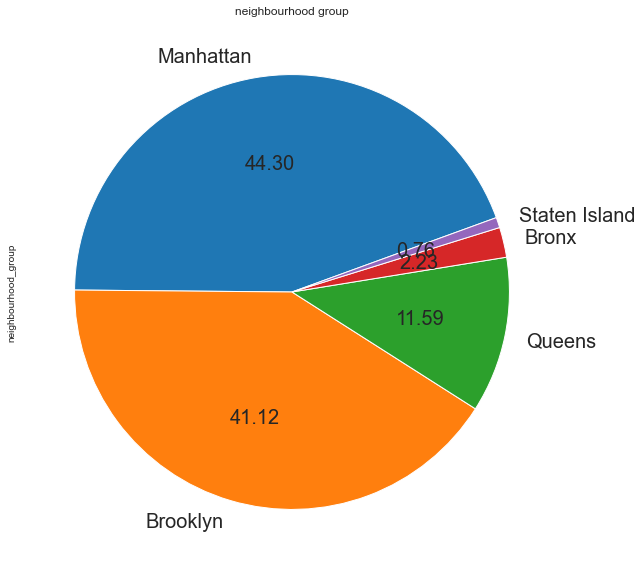

In [125]:
df.neighbourhood_group.value_counts().plot.pie(figsize = (10,10), fontsize = 20,autopct = '%.2f',
                                               startangle=20, title='neighbourhood group');

#### Above piechart explain the crowded area of sites listed on Airbnb and as results most of site crowded in only two areas i.e. Manhattan and Brooklyn followed by Queens.

#### To check why these three neighbourhood groups are always surrounded by crowd or is there any reason so that tourist visit these places more often, to finding the answer of these questions we took help of external sources and try to solve this question...

the reason Manhattan being faous/favourite tourist attraction:
(https://en.wikipedia.org/wiki/Tourism_in_New_York_City#:~:text=Times%20Square%20is%20the%20hub,at%2060%20million%20including%20daytrippers.)
    it has many tourist attractionions like 
    1. Times square
    2. World Trade Center
    3. Central Park
    4. Empire State Building
    5. Statue of Liberty
    These are the world famous touristrist attractions in manhattan which keeps it busy.
    
the reason Brooklyn being faous/favourite tourist attraction: 
(https://www.planetware.com/new-york/top-rated-attractions-things-to-do-in-brooklyn-ny-us-ny-74.htm#:~:text=Brooklyn%20Bridge,-The%20Brooklyn%20Bridge&text=Appreciate%20the%20massive%20towers%20built,years%20and%20opened%20in%201883.)
    it has many tourist attractionions like 
    1. Brooklyn Bridge
    2. Coney Island
    3. Brooklyn Bridge Park
    4. Flea Market
    5. New York transit Museum
    6. Botanic Garden    

#### After lots of searching we got some results which make sense why these areas are more often crowded and in addition we also ping link of source from which we gathered all these information.

###                                                        *Thank You*